In [1]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta


# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Signal_Generation')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Risk_Management')))

# Import the modules
from data import Data
from calculations import Calculations
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from entry_signal import Trend_Following, Mean_Reversion
from tail_risk import Stop_Loss, Take_Profit

                                close  creturns      high  log_return  \
date                coin                                                
2020-12-31 19:00:00 BTCUSDT  29331.69       NaN  29600.00         NaN   
                    ETHUSDT    728.91       NaN    749.00         NaN   
2021-01-01 19:00:00 BTCUSDT  32178.33  1.097050  33300.00    0.092625   
                    ETHUSDT    774.56  1.062628    787.69    0.060745   
2021-01-02 19:00:00 BTCUSDT  33000.05  1.125065  34778.11    0.025216   
                    ETHUSDT    978.28  1.342114   1011.07    0.233501   
2021-01-03 19:00:00 BTCUSDT  31988.71  1.090585  33600.00   -0.031126   
                    ETHUSDT   1041.43  1.428750   1162.97    0.062554   
2021-01-04 19:00:00 BTCUSDT  33949.53  1.157435  34360.00    0.059492   
                    ETHUSDT   1099.56  1.508499   1134.60    0.054315   
2021-01-05 19:00:00 BTCUSDT  36769.36  1.253571  36939.21    0.079790   
                    ETHUSDT   1208.42  1.657845   1

In [2]:
symbols = ['BTCUSDT', 'ETHUSDT']
start_time = dt.datetime(2024, 1, 1)
end_time = dt.datetime(2024, 2, 1)
timeframe = '1h'
data = Data(symbols, timeframe, start_time, end_time).df
#Perform coarse analysis and filtering
coarse = Coarse()
df = coarse.volume_flag(data, 1000)
df = coarse.sort_by_volume(df)
df = coarse.sort_by_std(df, 2, 2)
fine = Fine()
df = fine.above_ema(df, 2)
#Generate a signal
tf = Trend_Following()
mr = Mean_Reversion()
str_length = 10
str_mult = 3
_df = tf.supertrend_signals(df, str_length, str_mult)
condition = _df[f'SUPERTd_{str_length}_{float(str_mult)}'] == 1
_df['position'] = np.where(condition, 1, 0)
_df['position'] = _df['position'].shift(len(_df.index.get_level_values(1).unique())).fillna(0)
_df = Calculations().trades(_df)
_df = Calculations().strategy_returns(_df)
_df = Calculations().sessions(_df)
_df

close  creturns      high  log_return  \
date                                                                    
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  \
date                                                         ...   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1  ...   
                    ETHUSDT       2.472705e+07            1  ...   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1  ...   
                    ETHUSDT       1.938218e+07            1  ...   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1  ...   
...                                        ...          ...  ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...   
                    ETHUSDT       2.368532e+07            1  ...   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...   
                    ETHUSDT       2.200149e+07            1  ...   

                             SUPERT_10_3.0  SUPERTd_10_3.0  SUPERTl_10_3.0  \
date                                                                         
2023-12-31 19:00:00 BTCUSDT       0.000000               1             NaN   
                    ETHUSDT       0.000000               1             NaN   
2023-12-31 20:00:00 BTCUSDT            NaN               1             NaN   
                    ETHUSDT            NaN               1             NaN   
2023-12-31 21:00:00 BTCUSDT            NaN               1             NaN   
...                                    ...             ...             ...   
2024-01-31 16:00:00 ETHUSDT    2346.264505              -1             NaN   
2024-01-31 17:00:00 BTCUSDT   43680.887427              -1             NaN   
                    ETHUSDT    2345.623055              -1             NaN   
2024-01-31 18:00:00 BTCUSDT   43680.887427              -1             NaN   
                    ETHUSDT    2345.623055              -1             NaN   

                             SUPERTs_10_3.0  position  trades  strategy  \
date                                                                      
2023-12-31 19:00:00 BTCUSDT             NaN       0.0     0.0       N

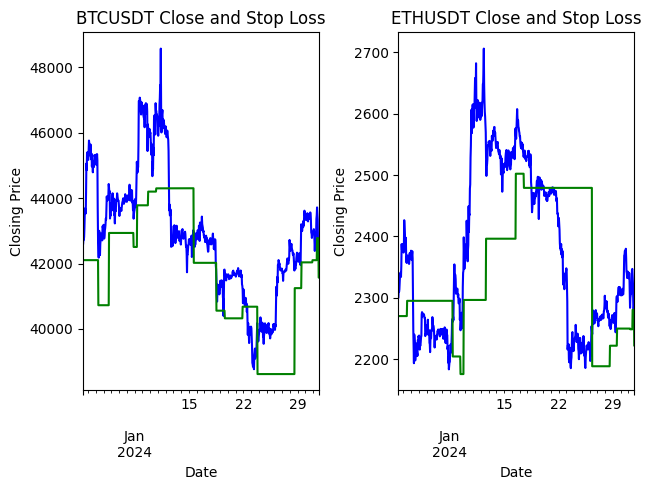

AttributeError: 'NoneType' object has no attribute 'unstack'

In [3]:
sl = Stop_Loss(_df, 'atr', 14, 3)
_df = sl.apply_stop_loss(fixed = True, plot = True)
tp = Take_Profit(_df, 'rr', 2)
_df = tp.apply_take_profit(fixed = True, plot = True)
_df